This data set classifies the people described by the set of attributes as good or bad credit risks. Firstly the dataset is loaded using read.csv().

In [1]:
#Reading the data from file
credit<-read.csv('credit.csv')

Lets look at the all the variables and thier data types

In [2]:
str(credit)#Examining the structure of data

'data.frame':	1000 obs. of  21 variables:
 $ Checking.Account        : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ Duration                : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Credit.History          : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ Puropose                : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ Credit.Amount           : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Savings                 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employment              : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ Installment.Rate        : int  4 2 2 2 3 2 3 2 2 4 ...
 $ Sex                     : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ Other.Debtors           : Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ Residence.Since         : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Real.Estate             : Fa

In [85]:
summary(credit)

 Checking.Account    Duration    Credit.History    Puropose   Credit.Amount  
 A11:274          Min.   : 4.0   A30: 40        A43    :280   Min.   :  250  
 A12:269          1st Qu.:12.0   A31: 49        A40    :234   1st Qu.: 1366  
 A13: 63          Median :18.0   A32:530        A42    :181   Median : 2320  
 A14:394          Mean   :20.9   A33: 88        A41    :103   Mean   : 3271  
                  3rd Qu.:24.0   A34:293        A49    : 97   3rd Qu.: 3972  
                  Max.   :72.0                  A46    : 50   Max.   :18424  
                                                (Other): 55                  
 Savings   employment Installment.Rate  Sex      Other.Debtors Residence.Since
 A61:603   A71: 62    Min.   :1.000    A91: 50   A101:907      Min.   :1.000  
 A62:103   A72:172    1st Qu.:2.000    A92:310   A102: 41      1st Qu.:2.000  
 A63: 63   A73:339    Median :3.000    A93:548   A103: 52      Median :3.000  
 A64: 48   A74:174    Mean   :2.973    A94: 92              

There are seven numerical varibles and rest of them are categorical variables.Visualizing the varibles in dataset

In [5]:
library("ggplot2")#loading the library

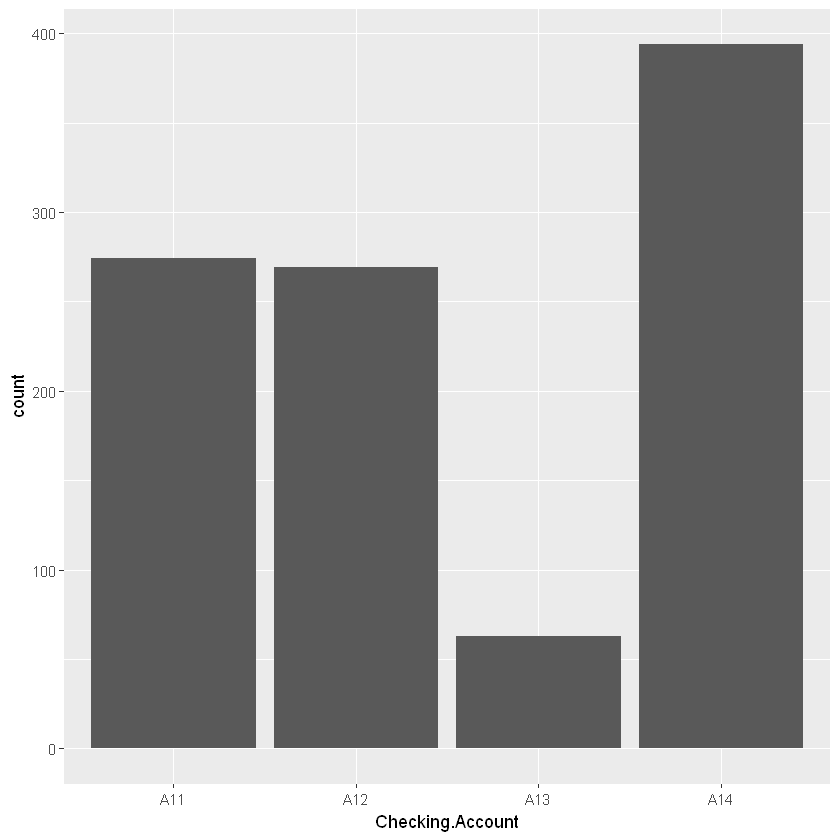

In [14]:
ggplot(data= credit, aes(x=Checking.Account))+geom_bar() #Plotting the bar graph for cateegorical variable

A11 : ... < 0 DM

A12 : 0 <= ... < 200 DM 

A13 : ... >= 200 DM / salary assignments for at least 1 year 

A14 : no checking account 

From the above barplot we can observe that the number of users having the no checking account are more, 

Now for our understanding, change the score variables from 1, 2 levels to "No" and "Yes"

In [16]:
credit$score[credit$score=="1"]<-"No" #Replacing the 1 with No 
credit$score[credit$score=="2"]<-"Yes" #Replacing the 2 with Yes
credit$score<-factor(credit$score) #

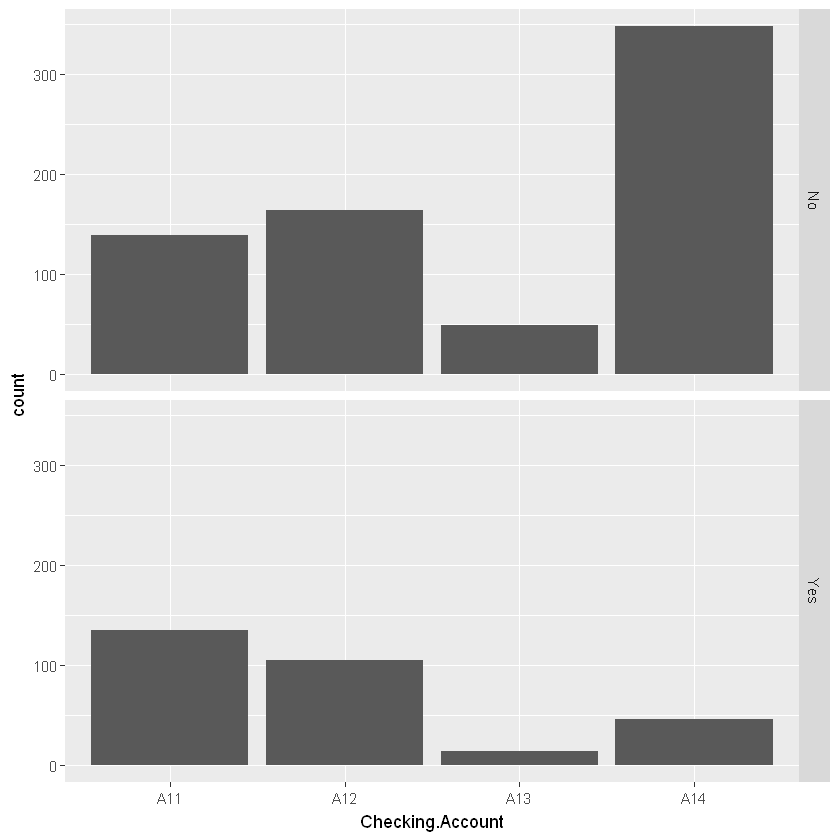

In [17]:
ggplot(data= credit, aes(x=Checking.Account))+geom_bar()+facet_grid(facets = score~.)

Most of the Customers with no checking account doesnt have any credit risk as expected.

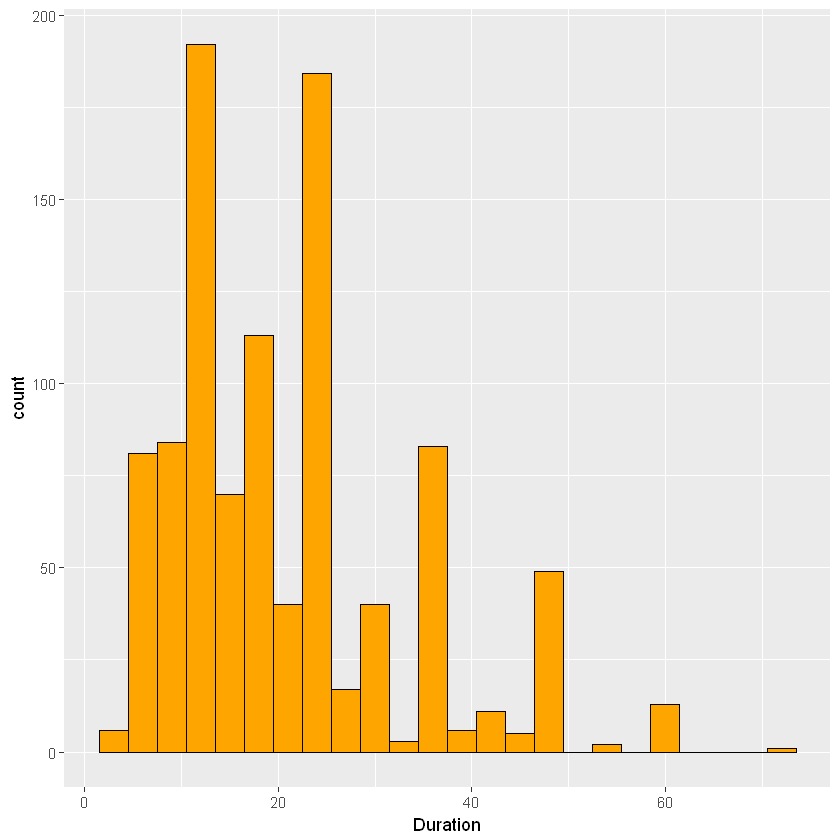

In [20]:
ggplot(data=credit, aes(x=Duration))+geom_histogram(binwidth=3, fill="orange", col="black")

Credit History Lables:

A30 : no credits taken/ all credits paid back duly 

A31 : all credits at this bank paid back duly 

A32 : existing credits paid back duly till now 

A33 : delay in paying off in the past 

A34 : critical account/ other credits existing (not at this bank) 

In [21]:
table(credit$Credit.History)


A30 A31 A32 A33 A34 
 40  49 530  88 293 

From the above table, majority of users paid back the due till now.

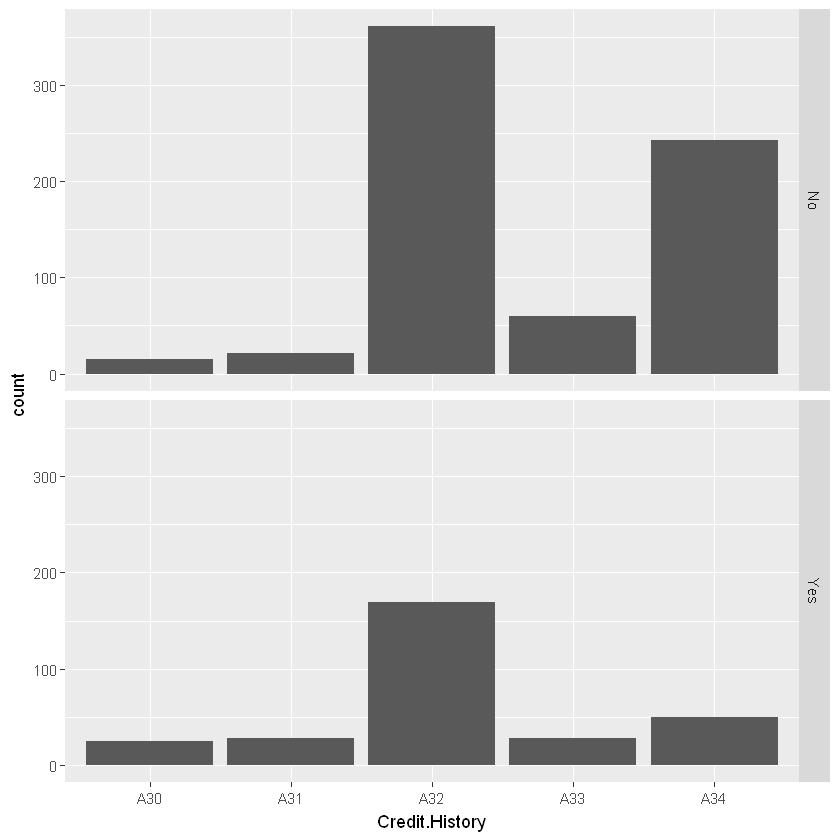

In [23]:
ggplot(data= credit, aes(x=Credit.History))+geom_bar()+facet_grid(facets = score~.)

As expected customers who pay the due maintain the good credit history and will not bbe in risk

Purpose:

A40 : car (new) 

A41 : car (used) 

A42 : furniture/equipment 

A43 : radio/television

A44 : domestic appliances

A45 : repairs 

A46 : education 

A47 : (vacation - does not exist?) 

A48 : retraining 

A49 : business

A410 : others 

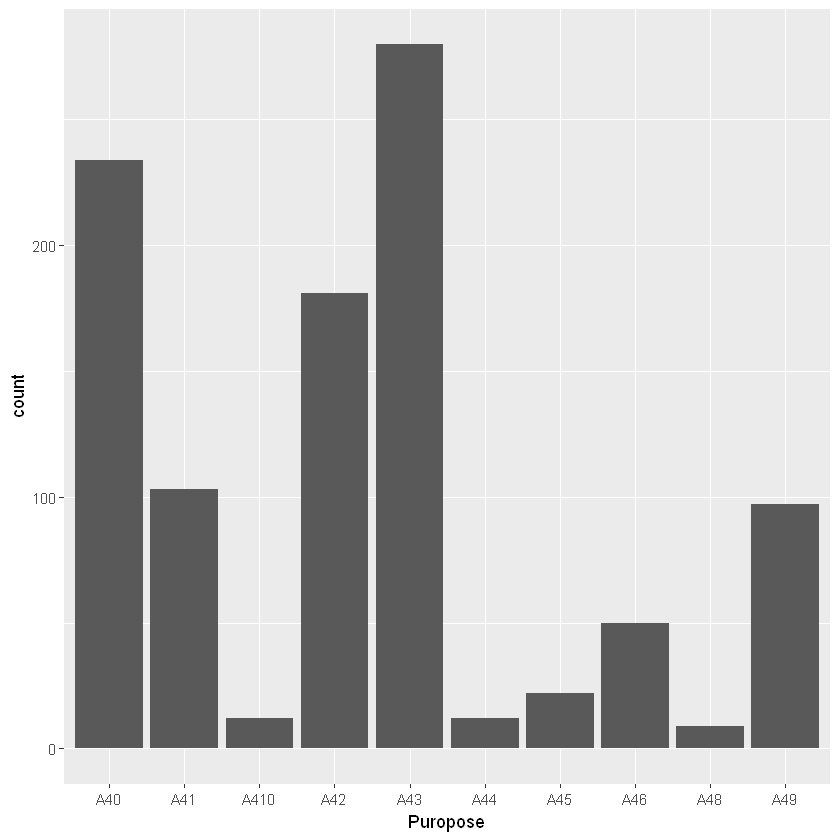

In [26]:
ggplot(data= credit, aes(x=Puropose))+geom_bar()

Interestingly, Majority of customers take loans for the purpose of radio/telivison new car.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


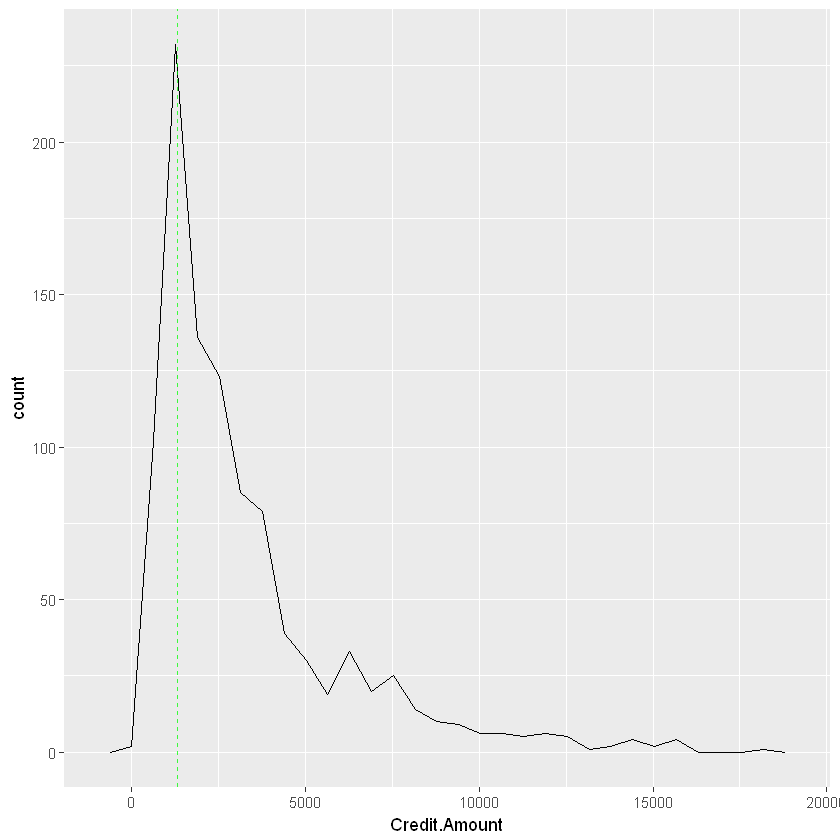

In [36]:
ggplot(data= credit, aes(x=Credit.Amount))+
geom_freqpoly()+
geom_vline(xintercept = c(1300), color = "green", linetype="dashed", alpha = 0.75)

Most of the users have 1300 as credit amount and very less users has more than 15000 credit amount

Present employment since 

A71 : unemployed 

A72 : ... < 1 year 

A73 : 1 <= ... < 4 years 

A74 : 4 <= ... < 7 years 

A75 : .. >= 7 years

In [38]:
table(credit$employment)


A71 A72 A73 A74 A75 
 62 172 339 174 253 

Users with employment more than 1 year and less than four years are more

Personal status and sex 

A91 : male : divorced/separated 

A92 : female : divorced/separated/married 

A93 : male : single 

A94 : male : married/widowed 

A95 : female : single 

In [43]:
table(credit$Sex)


A91 A92 A93 A94 
 50 310 548  92 

Majority of users are Male with staus single

Age

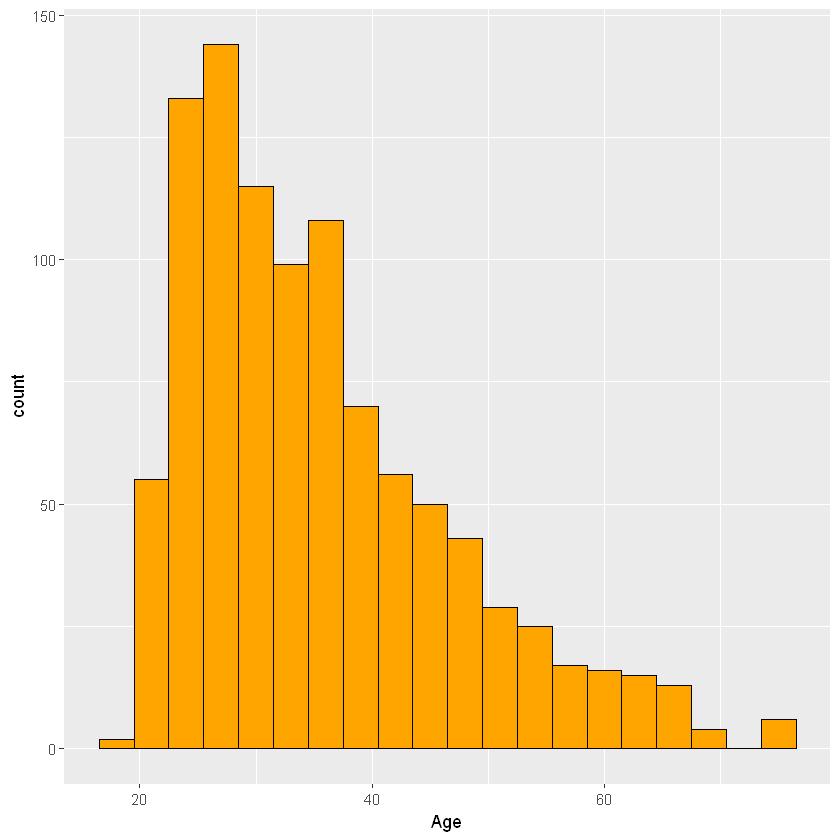

In [47]:
ggplot(data=credit,aes(x=Age))+geom_histogram(binwidth=3, fill="orange", col="black")

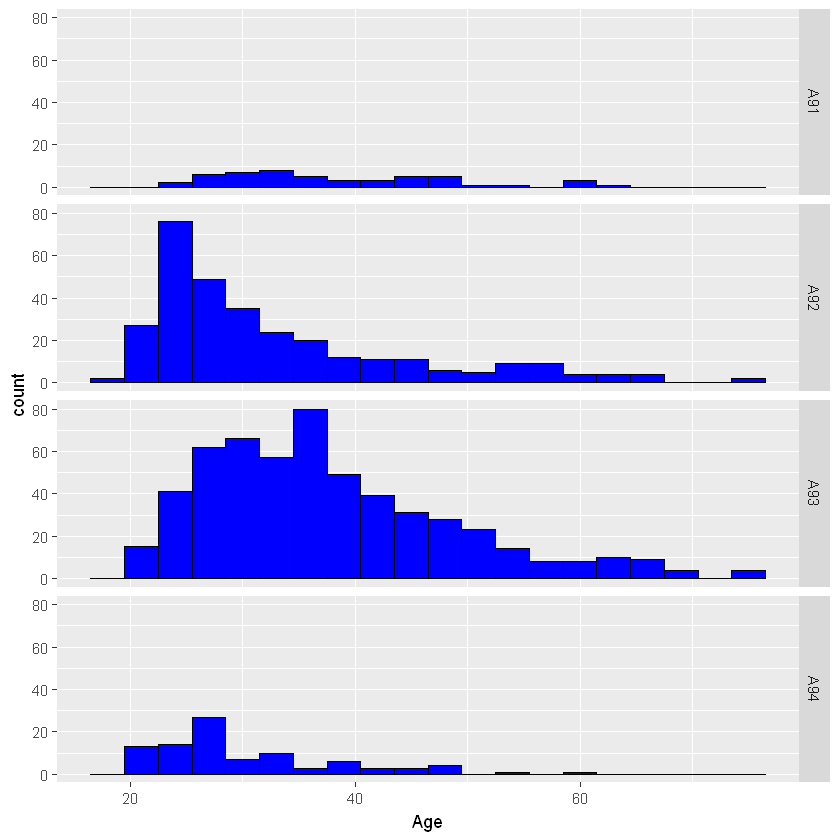

In [49]:
ggplot(data=credit,aes(x=Age))+geom_histogram(binwidth=3, fill="blue", col="black")+facet_grid(facets=Sex~.)

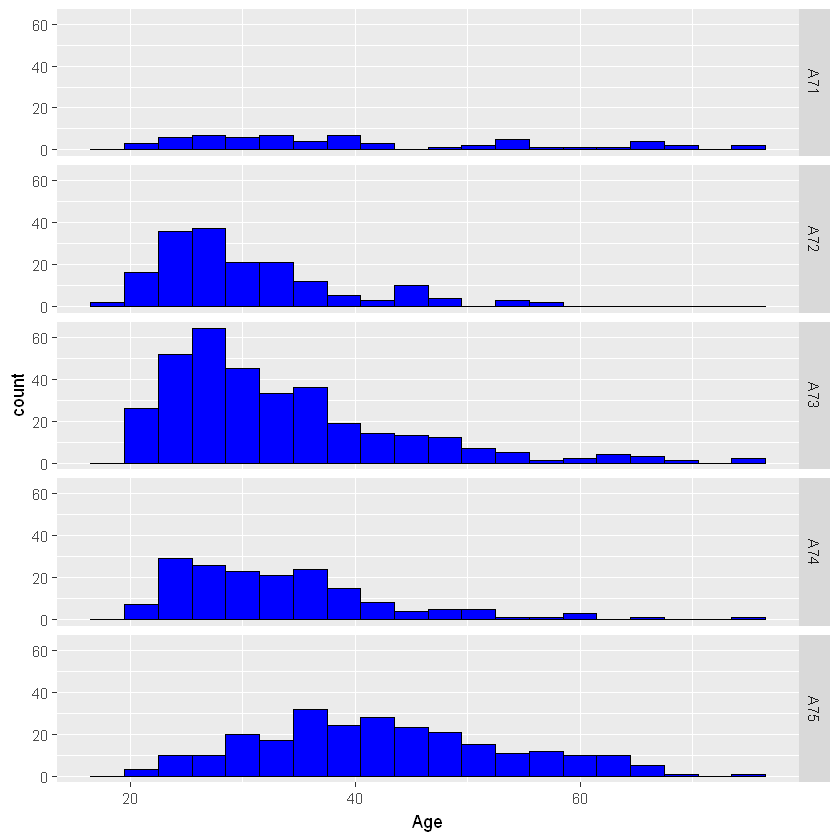

In [50]:
ggplot(data=credit,aes(x=Age))+geom_histogram(binwidth=3, fill="blue", col="black")+facet_grid(facets=employment~.)

Property 

A121 : real estate 

A122 : if not A121 : building society savings agreement/ life insurance 

A123 : if not A121/A122 : car or other, not in attribute 6 

A124 : unknown / no property 

In [52]:
table(credit$Real.Estate)


A121 A122 A123 A124 
 282  232  332  154 

Now Building the model to predict the risk of giving the loan by Decision trees. Split the data into train and test sets.

In [53]:
library(caTools)
set.seed(123)
train_sample<-sample(1000,900)
test_sample<-sample(1000, 100)

In [76]:
credit_train<-credit[train_sample,]
credit_test<-credit[test_sample,]

Applying the C5.0 algorithm and building the model

In [77]:
library(C50)
model<-C5.0(credit_train[-21], credit_train$score)

In [62]:
model


Call:
C5.0.default(x = credit_train[-21], y = credit_train$score)

Classification Tree
Number of samples: 900 
Number of predictors: 20 

Tree size: 54 

Non-standard options: attempt to group attributes


In [78]:
summary(model)


Call:
C5.0.default(x = credit_train[-21], y = credit_train$score)


C5.0 [Release 2.07 GPL Edition]  	Wed May 17 16:43:45 2017
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

Decision tree:

Checking.Account in {A13,A14}: No (412/50)
Checking.Account in {A11,A12}:
:...Other.Debtors = A103:
    :...Duration > 36: Yes (4/1)
    :   Duration <= 36:
    :   :...Other.Installments.Plans in {A142,A143}: No (24)
    :       Other.Installments.Plans = A141:
    :       :...Puropose = A40: Yes (3)
    :           Puropose in {A41,A410,A42,A43,A44,A45,A46,A48,A49}: No (7/1)
    Other.Debtors in {A101,A102}:
    :...Credit.History = A30: Yes (27/6)
        Credit.History = A34: No (102/30)
        Credit.History = A31:
        :...Other.Debtors = A101: Yes (26/8)
        :   Other.Debtors = A102: No (2)
        Credit.History in {A32,A33}:
        :...Savings in {A63,A64}: No (19/3)
            Savings = A62:
          

In [80]:
credit_predict<-predict(model, credit_test[-21])

In [81]:
library(gmodels)
CrossTable(credit_predict, credit_test$score, dnn=c("predict", "actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | actual 
     predict |        No |       Yes | Row Total | 
-------------|-----------|-----------|-----------|
          No |        69 |         6 |        75 | 
             |     3.709 |    10.028 |           | 
             |     0.920 |     0.080 |     0.750 | 
             |     0.945 |     0.222 |           | 
             |     0.690 |     0.060 |           | 
-------------|-----------|-----------|-----------|
         Yes |         4 |        21 |        25 | 
             |    11.127 |    30.083 |           | 
             |     0.160 |     0.840 |     0.250 | 
             |     0.055 |     0.778 |           | 
             |     0.040 |     0.210 |           | 
-------------|-----------|-----------|--------

For improving the performance lets boost the technique by using the trails while building the model. This process is called as Adaboosting.The trials parameter sets an upper limit; the algorithm will stop adding trees if it recognizes that additional trials do not seem to be improving the accuracy.

In [82]:
model<-C5.0(credit_train[-21], credit_train$score, trials = 10)
credit_predict<-predict(model, credit_test[-21])

In [103]:
summary(model)


Call:
C5.0.default(x = credit_train[-21], y = credit_train$score, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed May 17 16:49:24 2017
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

Checking.Account in {A13,A14}: No (412/50)
Checking.Account in {A11,A12}:
:...Other.Debtors = A103:
    :...Duration > 36: Yes (4/1)
    :   Duration <= 36:
    :   :...Other.Installments.Plans in {A142,A143}: No (24)
    :       Other.Installments.Plans = A141:
    :       :...Puropose = A40: Yes (3)
    :           Puropose in {A41,A410,A42,A43,A44,A45,A46,A48,A49}: No (7/1)
    Other.Debtors in {A101,A102}:
    :...Credit.History = A30: Yes (27/6)
        Credit.History = A34: No (102/30)
        Credit.History = A31:
        :...Other.Debtors = A101: Yes (26/8)
        :   Other.Debtors = A102: No (2)
        Credit.History in {A32,A33}:
        :...Savings in {A63,A64}: No (19/3)


In [104]:
CrossTable(credit_predict, credit_test$score, dnn=c("predict", "actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | actual 
     predict |        No |       Yes | Row Total | 
-------------|-----------|-----------|-----------|
          No |        73 |         5 |        78 | 
             |     4.530 |    12.247 |           | 
             |     0.936 |     0.064 |     0.780 | 
             |     1.000 |     0.185 |           | 
             |     0.730 |     0.050 |           | 
-------------|-----------|-----------|-----------|
         Yes |         0 |        22 |        22 | 
             |    16.060 |    43.421 |           | 
             |     0.000 |     1.000 |     0.220 | 
             |     0.000 |     0.815 |           | 
             |     0.000 |     0.220 |           | 
-------------|-----------|-----------|--------